In [64]:
import os
import random

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
import pandas as pd
import numpy as np # for data manipulation

from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report # for model evaluation metrics

import matplotlib.pyplot as plt
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,confusion_matrix,ConfusionMatrixDisplay



#Cargamos el fichero csv entregado junto con la actividad
estacionesDF = pd.read_csv('estaciones_madrid_202111.csv')

#Seleccionamos una estación en concreto
estacion8DF = estacionesDF[estacionesDF['ESTACION'] == 8]

estaciones = estacion8DF[['SO2', 'CO', 'NO', 'NO2', 'PM2.5', 'PM10', 'NOx', 'O3', 'TOL', 'BEN', 'EBE']]

#Eliminamos las filas que tienen nulos
estaciones = estaciones.dropna(axis=0)
#print(estaciones.info())
#print(estacion8DF.head())


In [65]:
#Discretizamos la columna objetivo PM10 > 20
rangos=[0,20]

PM10_class = pd.cut(estaciones['PM10'], rangos)
le = LabelEncoder()
PM10_class_encoded = le.fit_transform(PM10_class)
PM10_class_encoded



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [66]:
#Pintamos la tabla original antes de eliminar columnas
estaciones.head()


,SO2,CO,NO,NO2,PM2.5,PM10,NOx,O3,TOL,BEN,EBE
1,2.0,0.2,4.0,23.0,3.0,4.0,29.0,51.0,0.6,0.4,0.2
25,3.0,0.3,10.0,36.0,4.0,6.0,51.0,42.0,0.9,0.7,0.2
49,2.0,0.4,11.0,42.0,5.0,9.0,58.0,31.0,1.2,0.8,0.3
73,2.0,0.4,16.0,47.0,5.0,9.0,73.0,33.0,1.9,0.8,0.3
97,3.0,0.5,56.0,61.0,12.0,20.0,147.0,22.0,2.8,1.1,0.6


In [67]:
#Eliminamos la columna PM2.5 que está relacionada tal y como nos dice el enunciado

borra_columna = ['PM2.5']
X = estaciones.drop(columns=borra_columna)
y = PM10_class_encoded

X.head()


,SO2,CO,NO,NO2,PM10,NOx,O3,TOL,BEN,EBE
1,2.0,0.2,4.0,23.0,4.0,29.0,51.0,0.6,0.4,0.2
25,3.0,0.3,10.0,36.0,6.0,51.0,42.0,0.9,0.7,0.2
49,2.0,0.4,11.0,42.0,9.0,58.0,31.0,1.2,0.8,0.3
73,2.0,0.4,16.0,47.0,9.0,73.0,33.0,1.9,0.8,0.3
97,3.0,0.5,56.0,61.0,20.0,147.0,22.0,2.8,1.1,0.6


In [68]:
#Generamos un conjunto de entrenamiento y otro de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((186, 10), (80, 10))

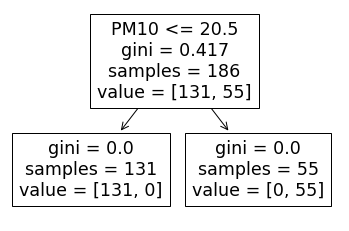

In [69]:
arbol_todas_columnas = tree.DecisionTreeClassifier()
arbol_todas_columnas = arbol_todas_columnas.fit(X_train, y_train)
_=tree.plot_tree(arbol_todas_columnas, feature_names=list(X_train.columns))


In [70]:
# Borramos la columna PM10 y vemos que el resultado depende de la columna PM2.5
borra_columnas = ['PM10']
X=X.drop(columns=borra_columnas)
X.head()


,SO2,CO,NO,NO2,NOx,O3,TOL,BEN,EBE
1,2.0,0.2,4.0,23.0,29.0,51.0,0.6,0.4,0.2
25,3.0,0.3,10.0,36.0,51.0,42.0,0.9,0.7,0.2
49,2.0,0.4,11.0,42.0,58.0,31.0,1.2,0.8,0.3
73,2.0,0.4,16.0,47.0,73.0,33.0,1.9,0.8,0.3
97,3.0,0.5,56.0,61.0,147.0,22.0,2.8,1.1,0.6


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((186, 9), (80, 9))

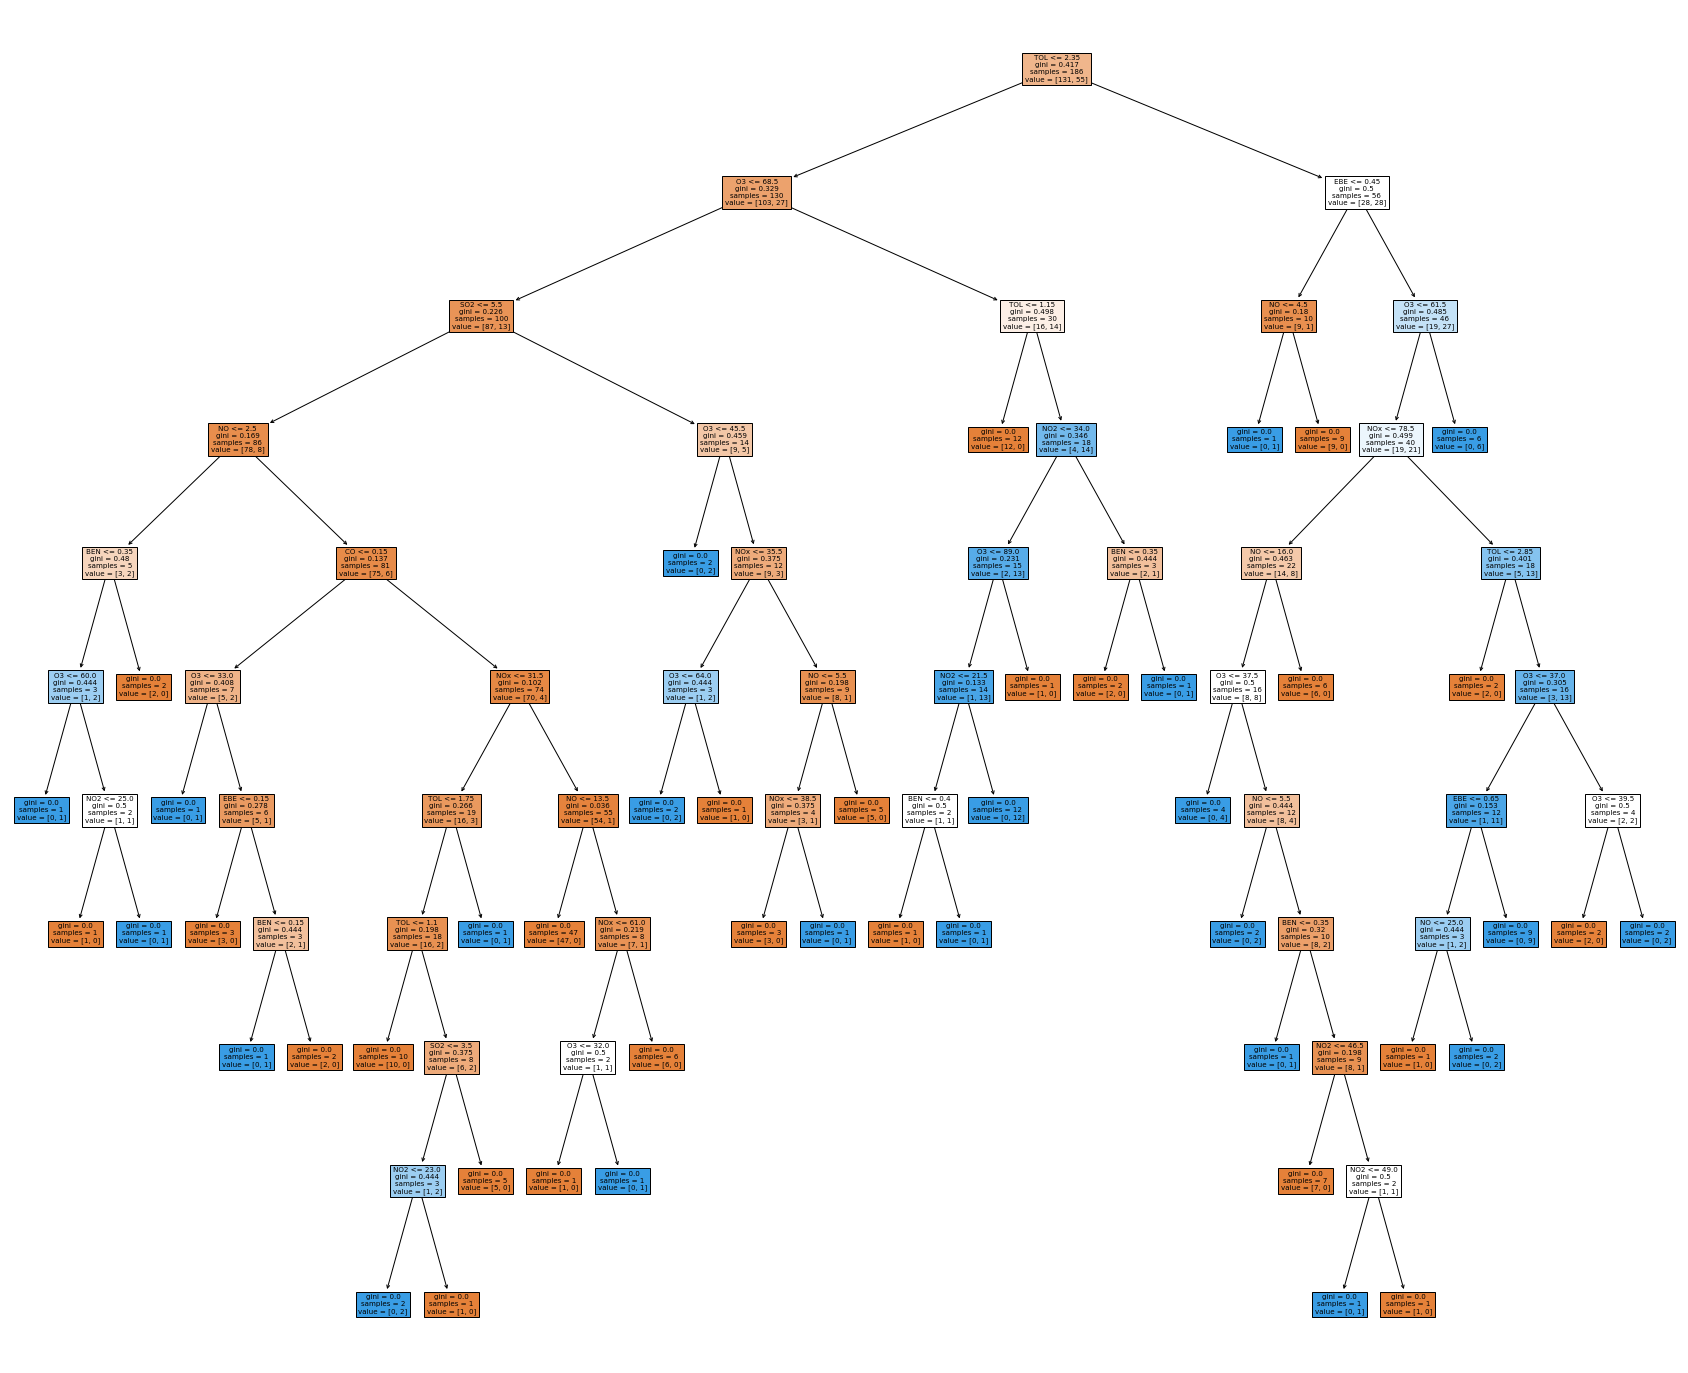

In [72]:
arbol_2 = tree.DecisionTreeClassifier()
arbol_2 = arbol_2.fit(X_train, y_train)
fig=plt.figure(figsize=(30,25))
_=tree.plot_tree(arbol_2,feature_names=list(X_train.columns),filled=True)

In [73]:
print(X.columns)
print(arbol_2.feature_importances_)


Index(['SO2', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'TOL', 'BEN', 'EBE'], dtype='object')
[0.04319521 0.00885986 0.11540023 0.08248637 0.0869482  0.26705007
 0.25556565 0.07945408 0.06104034]


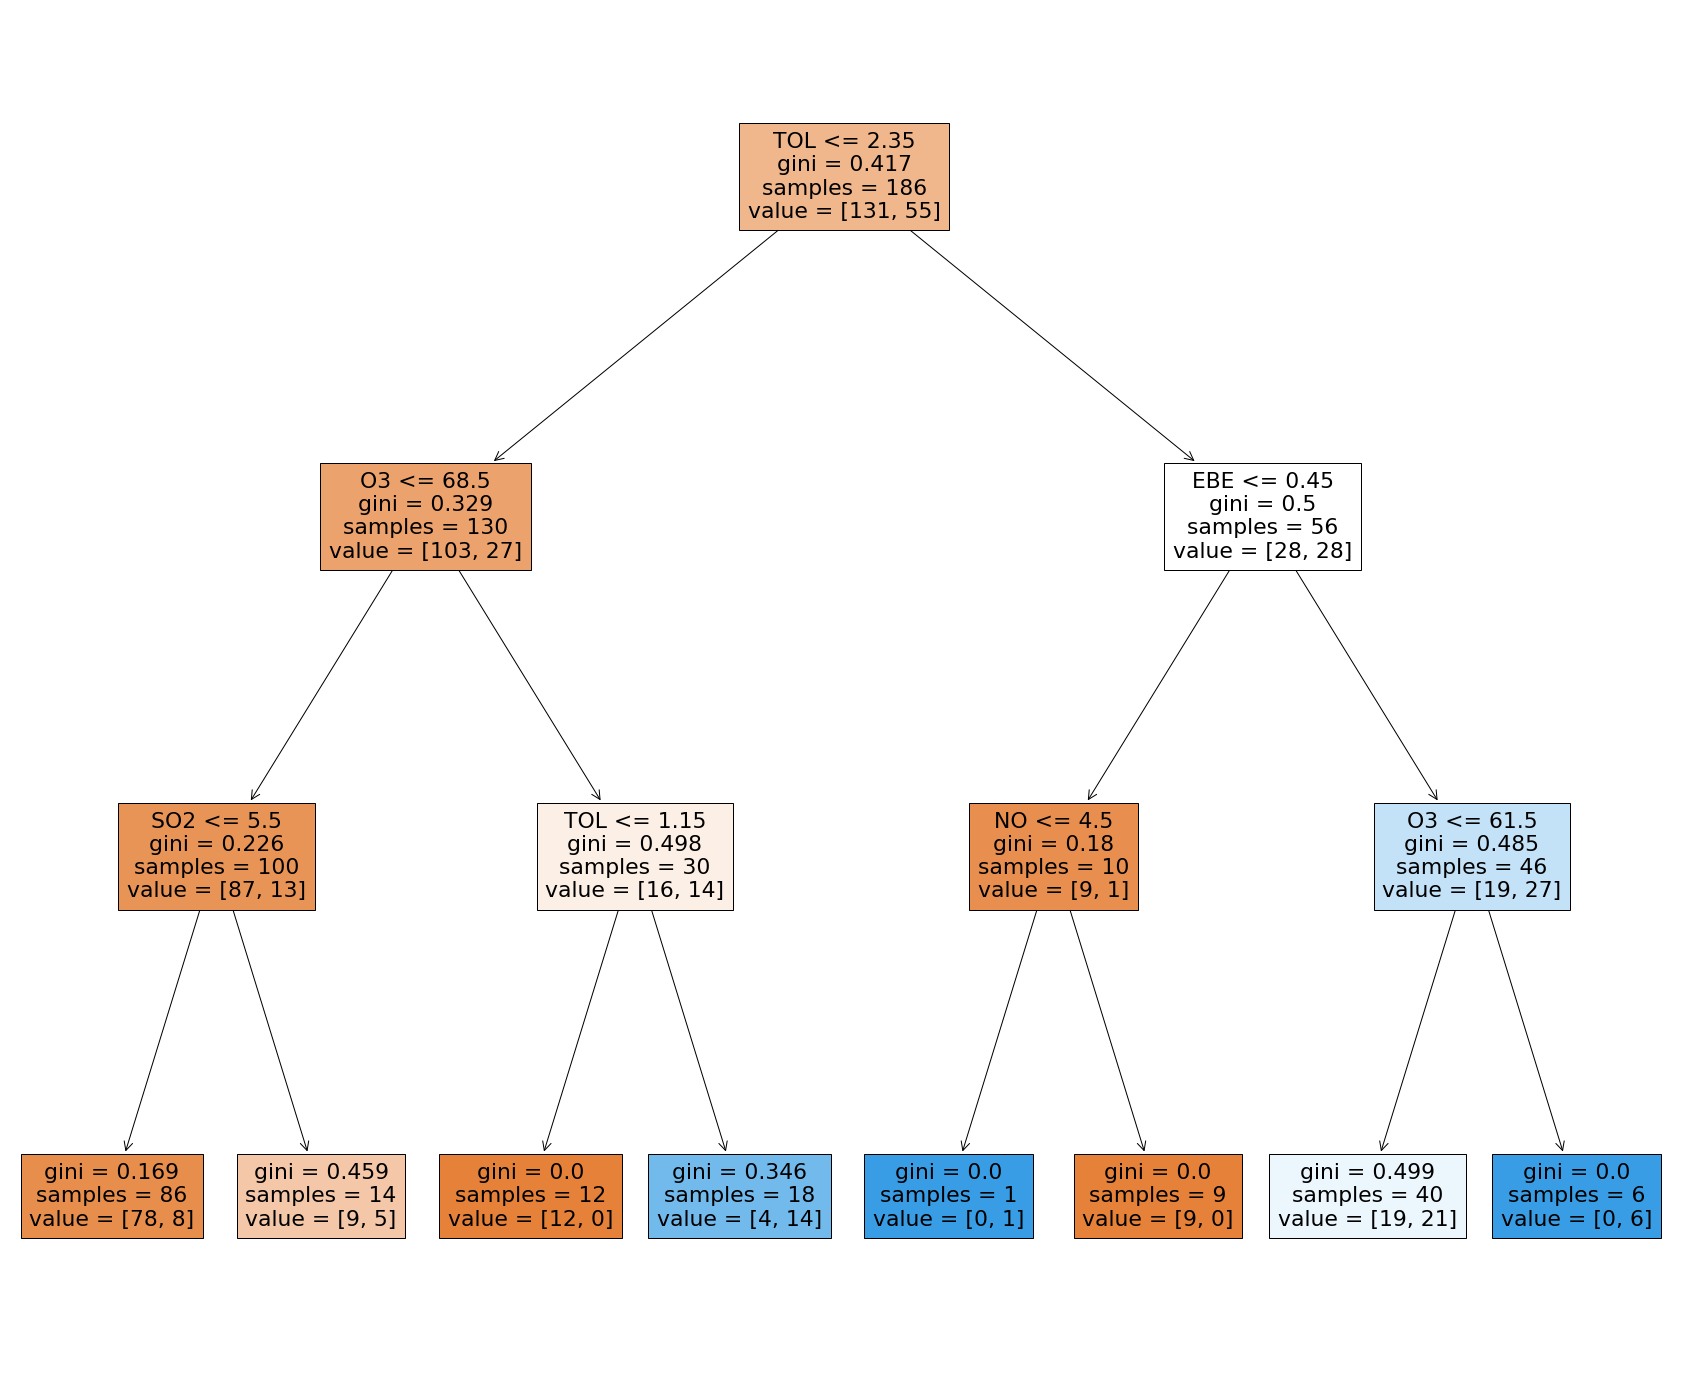

In [74]:
# Si se deja sin límíte de profundidad, los árboles quedan sobreajustados, vamos a fijar una profundidad máxima
arbol_3 = tree.DecisionTreeClassifier(max_depth=3)
arbol_3 = arbol_3.fit(X_train, y_train)
fig=plt.figure(figsize=(30,25))
_=tree.plot_tree(arbol_3,feature_names=list(X_train.columns),filled=True)








_______________________________________
Ahora realizamos lo mismo para la clase objetivo NO2

In [75]:
#Primero miramos los datos de NO2
estaciones.head(20)


,SO2,CO,NO,NO2,PM2.5,PM10,NOx,O3,TOL,BEN,EBE
1,2.0,0.2,4.0,23.0,3.0,4.0,29.0,51.0,0.6,0.4,0.2
25,3.0,0.3,10.0,36.0,4.0,6.0,51.0,42.0,0.9,0.7,0.2
49,2.0,0.4,11.0,42.0,5.0,9.0,58.0,31.0,1.2,0.8,0.3
73,2.0,0.4,16.0,47.0,5.0,9.0,73.0,33.0,1.9,0.8,0.3
97,3.0,0.5,56.0,61.0,12.0,20.0,147.0,22.0,2.8,1.1,0.6
121,3.0,0.4,9.0,41.0,8.0,14.0,55.0,31.0,1.5,0.9,0.4
145,2.0,0.4,15.0,43.0,7.0,12.0,65.0,27.0,1.5,0.9,0.4
169,2.0,0.3,11.0,35.0,6.0,11.0,52.0,35.0,1.3,0.8,0.3
192,2.0,0.3,3.0,24.0,4.0,5.0,29.0,47.0,0.5,0.7,0.2
214,2.0,0.3,3.0,27.0,6.0,7.0,32.0,49.0,0.6,0.7,0.3


In [76]:
#Discretizamos la columna objetivo NO2 > 35
rangos=[0,35]

NO2_class = pd.cut(estaciones['NO2'], rangos)
le = LabelEncoder()
NO2_class_encoded = le.fit_transform(NO2_class)
NO2_class_encoded

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1])

In [77]:
#Eliminamos la columna NO2

borra_columna = ['NO2']
Z = estaciones.drop(columns=borra_columna)
y = NO2_class_encoded

Z.head()


,SO2,CO,NO,PM2.5,PM10,NOx,O3,TOL,BEN,EBE
1,2.0,0.2,4.0,3.0,4.0,29.0,51.0,0.6,0.4,0.2
25,3.0,0.3,10.0,4.0,6.0,51.0,42.0,0.9,0.7,0.2
49,2.0,0.4,11.0,5.0,9.0,58.0,31.0,1.2,0.8,0.3
73,2.0,0.4,16.0,5.0,9.0,73.0,33.0,1.9,0.8,0.3
97,3.0,0.5,56.0,12.0,20.0,147.0,22.0,2.8,1.1,0.6


In [78]:
#Generamos un conjunto de entrenamiento y otro de test
Z_train, Z_test, v_train, v_test = train_test_split(Z, y, test_size = 0.3, random_state = 1)
Z_train.shape, Z_test.shape

((186, 10), (80, 10))

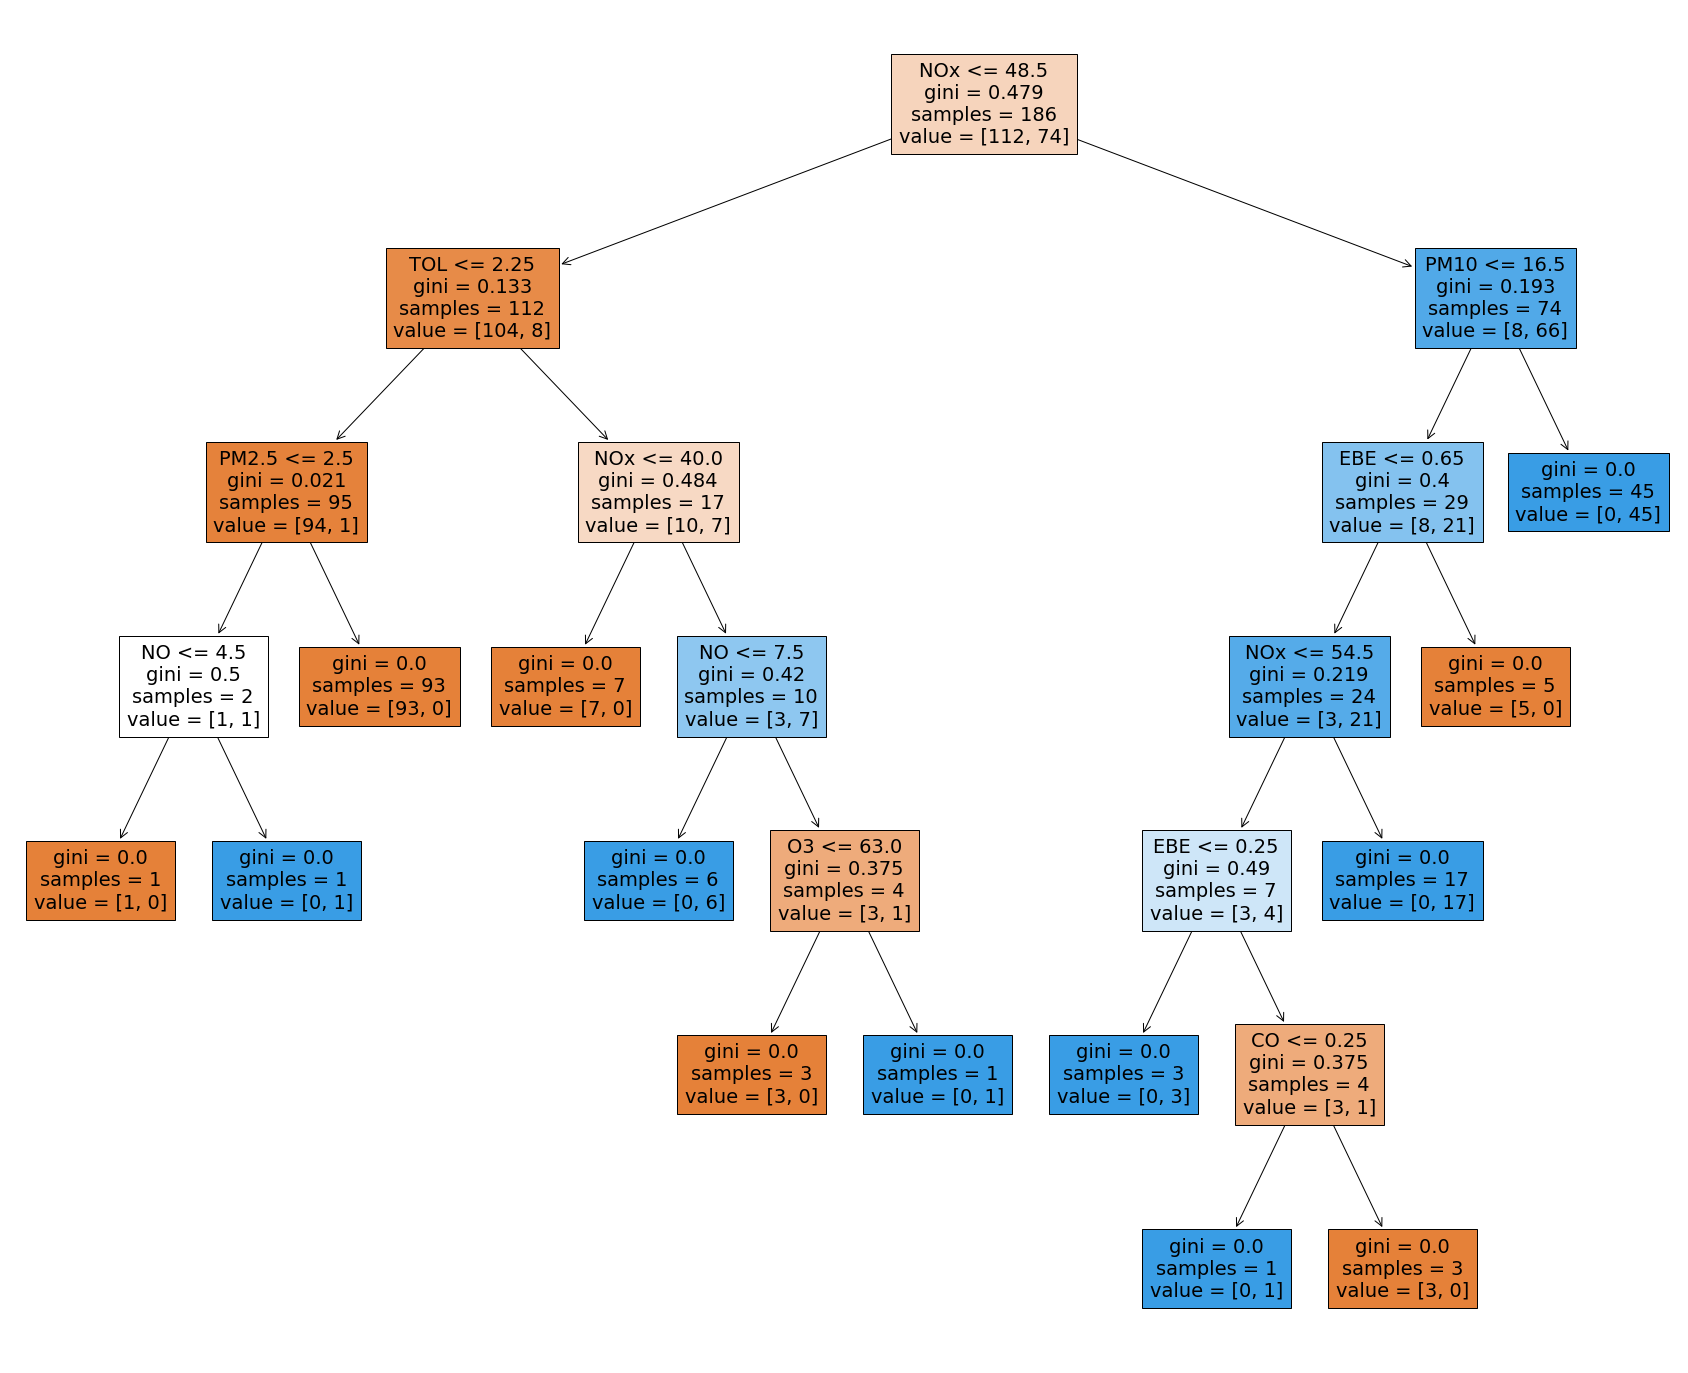

In [79]:
#Generamos el arbol sin limitar la profundidad llega a entropía 0 está sobre ajustado
arbol_4 = tree.DecisionTreeClassifier()
arbol_4 = arbol_4.fit(Z_train, v_train)
fig=plt.figure(figsize=(30,25))
_=tree.plot_tree(arbol_4,feature_names=list(Z_train.columns),filled=True)

In [80]:
print(Z.columns)
print(arbol_4.feature_importances_)

Index(['SO2', 'CO', 'NO', 'PM2.5', 'PM10', 'NOx', 'O3', 'TOL', 'BEN', 'EBE'], dtype='object')
[0.         0.01683156 0.04151786 0.01098481 0.03011799 0.73887859
 0.01683156 0.05209819 0.         0.09273943]


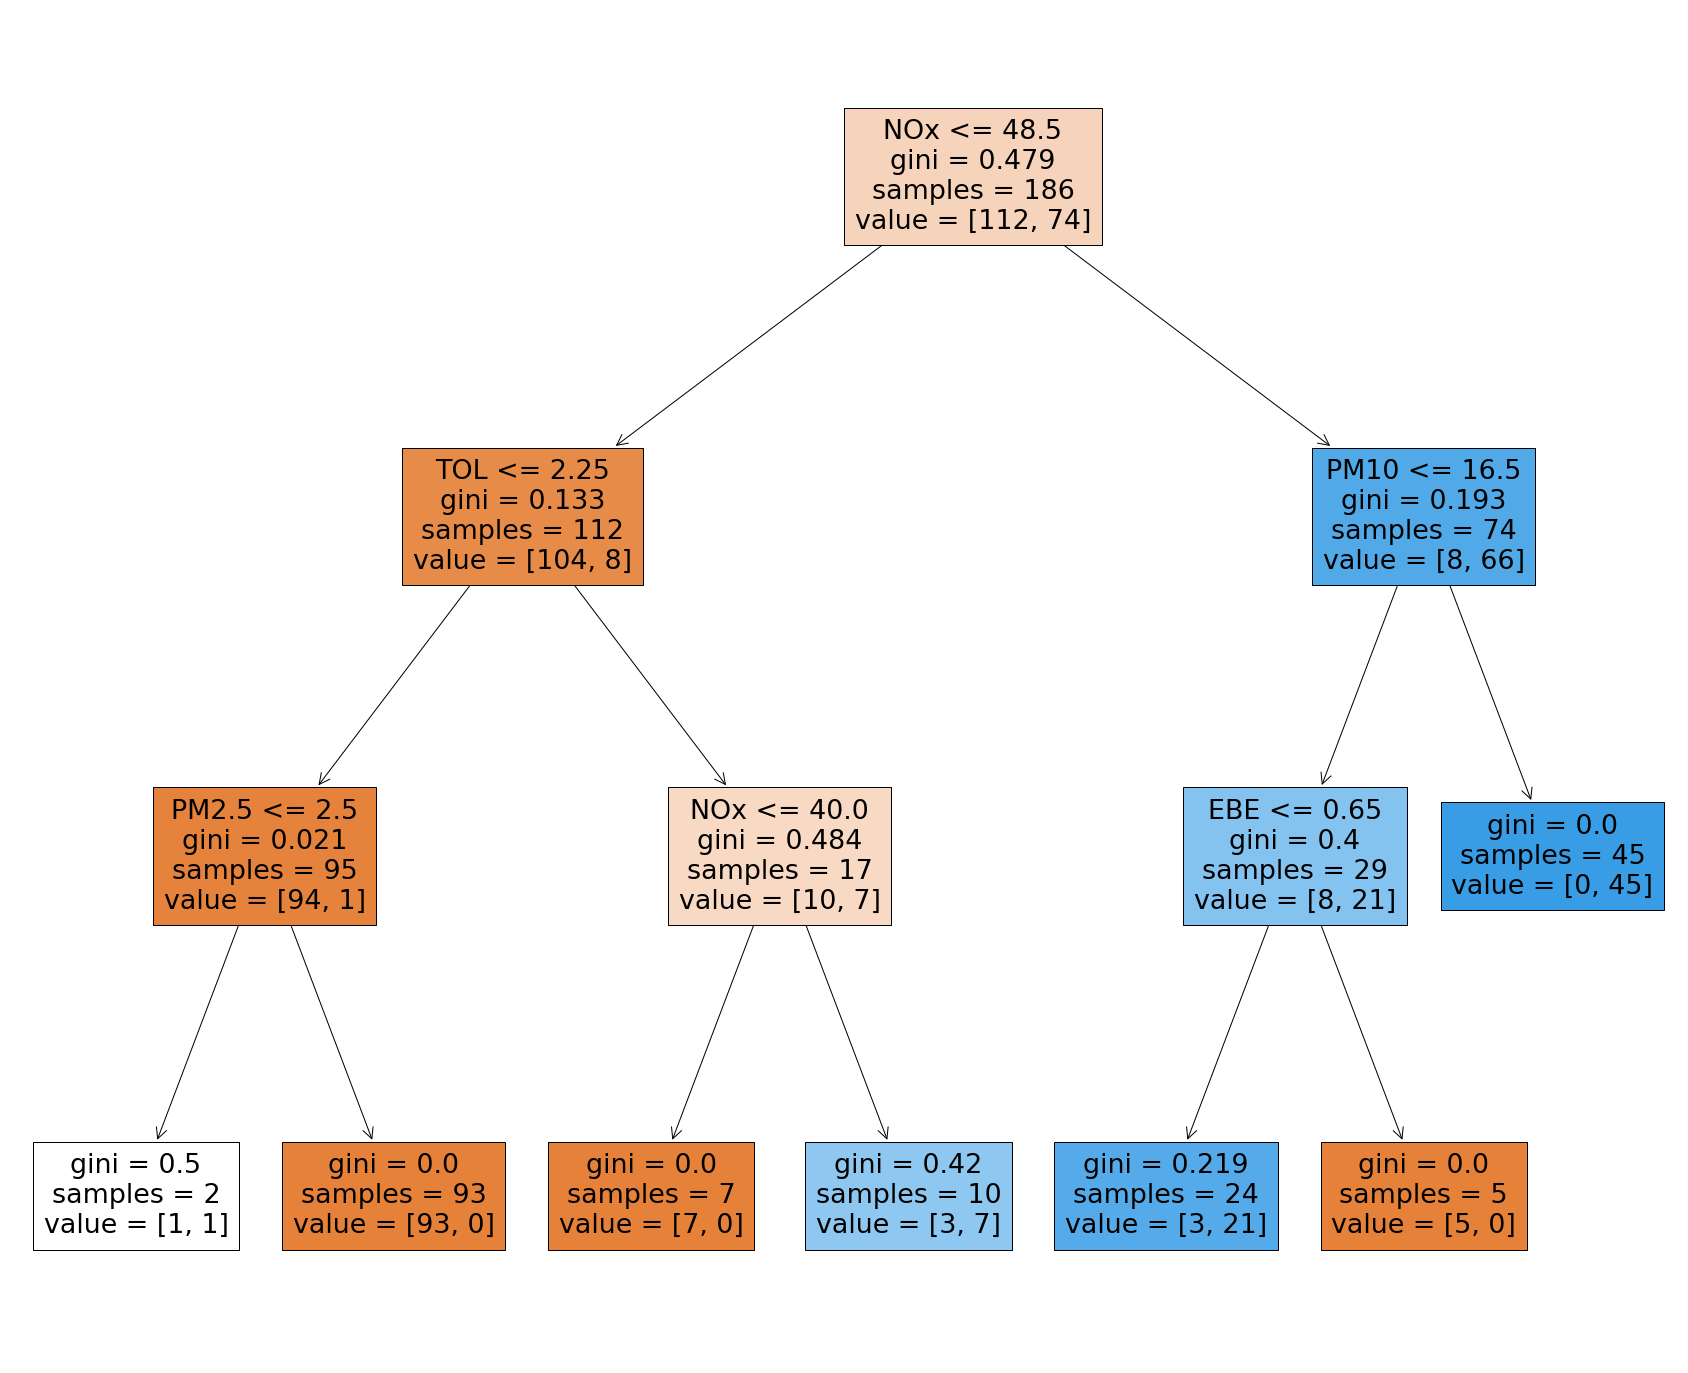

In [81]:
# Fijar una profundidad máxima = 3
arbol_5 = tree.DecisionTreeClassifier(max_depth=3)
arbol_5 = arbol_5.fit(Z_train, v_train)
fig=plt.figure(figsize=(30,25))
_=tree.plot_tree(arbol_5,feature_names=list(Z_train.columns),filled=True)

TRAIN
Accuracy:  0.9623655913978495
F1:  0.954248366013072
TEST
Accuracy:  0.9375
F1:  0.9090909090909091
[[50  2]
 [ 3 25]]


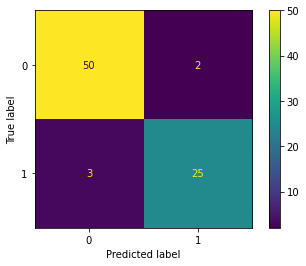

In [82]:
#Métricas evaluación (Matriz de confusión)
v_train_predicted=arbol_5.predict(Z_train)
train_cnf=confusion_matrix(v_train,v_train_predicted)
print ("TRAIN")
print ("Accuracy: ", accuracy_score(v_train,v_train_predicted))
print ("F1: ", f1_score(v_train,v_train_predicted))


v_test_predicted=arbol_5.predict(Z_test)
test_cnf=confusion_matrix(v_test,v_test_predicted)
print ("TEST")
print ("Accuracy: ", accuracy_score(v_test,v_test_predicted))
print ("F1: ", f1_score(v_test,v_test_predicted))

print (test_cnf)

_=ConfusionMatrixDisplay(test_cnf).plot()




___
Ahora vamos a relizar la correlación de Pearson

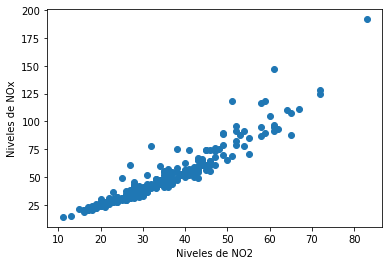

In [83]:
plt.scatter(estaciones["NO2"], estaciones["NOx"])
plt.xlabel("Niveles de NO2")
plt.ylabel("Niveles de NOx")

plt.show()

In [84]:
#Matriz de correlación
#-1 (existe una relación fuerte)    0   1(existe una relación fuerte)
#El signo del 1 indca la dirección (positiva o negativa)
estaciones.corr(method="pearson")

,SO2,CO,NO,NO2,PM2.5,PM10,NOx,O3,TOL,BEN,EBE
SO2,1.000000,-0.336019,-0.306032,-0.229335,0.196723,0.124659,-0.284479,0.549560,-0.184320,-0.402213,-0.087437
CO,-0.336019,1.000000,0.601346,0.545505,0.063327,0.223059,0.605617,-0.510906,0.611189,0.826911,0.486703
NO,-0.306032,0.601346,1.000000,0.794954,0.221424,0.258150,0.951561,-0.699497,0.687856,0.692435,0.336258
NO2,-0.229335,0.545505,0.794954,1.000000,0.265836,0.301786,0.942392,-0.607711,0.689221,0.634150,0.289329
PM2.5,0.196723,0.063327,0.221424,0.265836,1.000000,0.784501,0.255892,-0.179348,0.212754,0.072122,0.134725
PM10,0.124659,0.223059,0.258150,0.301786,0.784501,1.000000,0.293017,-0.140948,0.398423,0.221295,0.294906
NOx,-0.284479,0.605617,0.951561,0.942392,0.255892,0.293017,1.000000,-0.693198,0.727237,0.702009,0.331305
O3,0.549560,-0.510906,-0.699497,-0.607711,-0.179348,-0.140948,-0.693198,1.000000,-0.491829,-0.596891,-0.266809
TOL,-0.184320,0.611189,0.687856,0.689221,0.212754,0.398423,0.727237,-0.491829,1.000000,0.663422,0.648821
BEN,-0.402213,0.826911,0.692435,0.634150,0.072122,0.221295,0.702009,-0.596891,0.663422,1.000000,0.524565


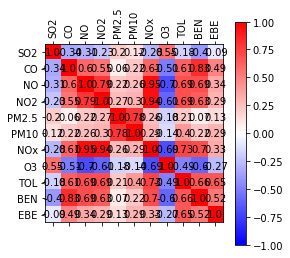

<Figure size 360x576 with 0 Axes>

In [85]:
#Matriz de Correlación
matriz = estaciones.corr(method="pearson")

plt.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)
plt.xticks(range(11), estaciones.columns, rotation=90)
plt.yticks(range(11), estaciones.columns)

for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i, j], 2), ha="center", va="center")

plt.colorbar()
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(8)
plt.show()


___
Vamos a realizar pruebas con varias estaciones


In [86]:
filename="estaciones_madrid_202111.csv"
datos=pd.read_csv(filename,sep=',',index_col=['ANO','MES','DIA','MUNICIPIO','ESTACION'])
datos.columns


Index(['SO2', 'CO', 'NO', 'NO2', 'PM2.5', 'PM10', 'NOx', 'O3', 'TOL', 'BEN',
       'EBE'],
      dtype='object')

In [87]:
#Elegimos las estaciones 8 y 24 por que son las que más datos tienen para el estudio
estaciones_8_24 =datos.loc[datos.index.get_level_values('ESTACION').isin([8,24])]
estaciones_8_24.head(20)

SO2   CO    NO   NO2  PM2.5  PM10    NOx  \
ANO  MES DIA MUNICIPIO ESTACION                                             
2021 1   1   79        8         2.0  0.2   4.0  23.0    3.0   4.0   29.0   
                       24        NaN  NaN   1.0   3.0    3.0   3.0    4.0   
         2   79        8         3.0  0.3  10.0  36.0    4.0   6.0   51.0   
                       24        NaN  NaN   1.0   9.0    3.0   4.0   11.0   
         3   79        8         2.0  0.4  11.0  42.0    5.0   9.0   58.0   
                       24        NaN  NaN   3.0  21.0    6.0   8.0   25.0   
         4   79        8         2.0  0.4  16.0  47.0    5.0   9.0   73.0   
                       24        NaN  NaN   1.0  12.0    5.0   6.0   13.0   
         5   79        8         3.0  0.5  56.0  61.0   12.0  20.0  147.0   
                       24        NaN  NaN  18.0  37.0   12.0  16.0   64.0   
         6   79        8         3.0  0.4   9.0  41.0    8.0  14.0   55.0   
                       24        NaN  NaN   9.0  32.0   12.0  14.0   46.0   
         7   79        8         2.0  0.4  15.0  43.0    7.0  12.0   65.0   
                       24        NaN  NaN   2.0  25.0    7.0   8.0   28.0   
         8   79        8         2.0  0.3  11.0  35.0    6.0  11.0   52.0   
                       24        NaN  NaN   2.0  18.0    6.0   7.0   21.0   
         9   79        8         2.0  0.3   3.0  24.0    4.0   5.0   29.0   
         10  79        8         2.0  0.3   3.0  27.0    6.0   7.0   32.0   
         11  79        8         NaN  0.4  11.0  39.0    NaN   NaN   56.0   
                       24        NaN  NaN   4.0  22.0   14.0  15.0   28.0   

                                   O3  TOL  BEN  EBE  
ANO  MES DIA MUNICIPIO ESTACION                       
2021 1   1   79        8         51.0  0.6  0.4  0.2  
                       24        65.0  0.1  0.2  0.1  
         2   79        8         42.0  0.9  0.7  0.2  
                       24        57.0  0.3  0.4  0.1  
         3   79        8         31.0  1.2  0.8  0.3  
                       24        38.0  0.7  0.6  0.1  
         4   79        8         33.0  1.9  0.8  0.3  
                       24        55.0  0.3  0.4  0.1  
         5   79        8         22.0  2.8  1.1  0.6  
                       24        23.0  1.8  0.7  0.2  
         6   79        8         31.0  1.5  0.9  0.4  
                       24        24.0  1.3  0.9  0.1  
         7   79        8         27.0  1.5  0.9  0.4  
                       24        33.0  0.7  0.6  0.1  
         8   79        8         35.0  1.3  0.8  0.3  
                       24        44.0  0.5  0.6  0.1  
         9   79        8         47.0  0.5  0.7  0.2  
         10  79        8         49.0  0.6  0.7  0.3  
         11  79        8          NaN  1.0  0.8  0.9  
                       24        39.0  0.7  0.7  0.1

In [88]:
#Borramos estas columnas ya que no tienen datos
estaciones_8_24=estaciones_8_24.drop(columns=['SO2','CO'])
estaciones_8_24=estaciones_8_24.dropna(axis=0)
estaciones_8_24.head(20)

NO   NO2  PM2.5  PM10    NOx    O3  TOL  \
ANO  MES DIA MUNICIPIO ESTACION                                              
2021 1   1   79        8          4.0  23.0    3.0   4.0   29.0  51.0  0.6   
                       24         1.0   3.0    3.0   3.0    4.0  65.0  0.1   
         2   79        8         10.0  36.0    4.0   6.0   51.0  42.0  0.9   
                       24         1.0   9.0    3.0   4.0   11.0  57.0  0.3   
         3   79        8         11.0  42.0    5.0   9.0   58.0  31.0  1.2   
                       24         3.0  21.0    6.0   8.0   25.0  38.0  0.7   
         4   79        8         16.0  47.0    5.0   9.0   73.0  33.0  1.9   
                       24         1.0  12.0    5.0   6.0   13.0  55.0  0.3   
         5   79        8         56.0  61.0   12.0  20.0  147.0  22.0  2.8   
                       24        18.0  37.0   12.0  16.0   64.0  23.0  1.8   
         6   79        8          9.0  41.0    8.0  14.0   55.0  31.0  1.5   
                       24         9.0  32.0   12.0  14.0   46.0  24.0  1.3   
         7   79        8         15.0  43.0    7.0  12.0   65.0  27.0  1.5   
                       24         2.0  25.0    7.0   8.0   28.0  33.0  0.7   
         8   79        8         11.0  35.0    6.0  11.0   52.0  35.0  1.3   
                       24         2.0  18.0    6.0   7.0   21.0  44.0  0.5   
         9   79        8          3.0  24.0    4.0   5.0   29.0  47.0  0.5   
         10  79        8          3.0  27.0    6.0   7.0   32.0  49.0  0.6   
         11  79        24         4.0  22.0   14.0  15.0   28.0  39.0  0.7   
         12  79        24        15.0  55.0   26.0  28.0   78.0  23.0  1.7   

                                 BEN  EBE  
ANO  MES DIA MUNICIPIO ESTACION            
2021 1   1   79        8         0.4  0.2  
                       24        0.2  0.1  
         2   79        8         0.7  0.2  
                       24        0.4  0.1  
         3   79        8         0.8  0.3  
                       24        0.6  0.1  
         4   79        8         0.8  0.3  
                       24        0.4  0.1  
         5   79        8         1.1  0.6  
                       24        0.7  0.2  
         6   79        8         0.9  0.4  
                       24        0.9  0.1  
         7   79        8         0.9  0.4  
                       24        0.6  0.1  
         8   79        8         0.8  0.3  
                       24        0.6  0.1  
         9   79        8         0.7  0.2  
         10  79        8         0.7  0.3  
         11  79        24        0.7  0.1  
         12  79        24        1.1  0.2

In [89]:
#Discretizamos la columna objetivo NO2 > 35
rangos=[0,30]
estacionesOnly = estaciones_8_24[['NO', 'NO2', 'PM2.5', 'PM10', 'NOx', 'O3', 'TOL', 'BEN', 'EBE']]
estacionesOnly.head(20)

NO   NO2  PM2.5  PM10    NOx    O3  TOL  \
ANO  MES DIA MUNICIPIO ESTACION                                              
2021 1   1   79        8          4.0  23.0    3.0   4.0   29.0  51.0  0.6   
                       24         1.0   3.0    3.0   3.0    4.0  65.0  0.1   
         2   79        8         10.0  36.0    4.0   6.0   51.0  42.0  0.9   
                       24         1.0   9.0    3.0   4.0   11.0  57.0  0.3   
         3   79        8         11.0  42.0    5.0   9.0   58.0  31.0  1.2   
                       24         3.0  21.0    6.0   8.0   25.0  38.0  0.7   
         4   79        8         16.0  47.0    5.0   9.0   73.0  33.0  1.9   
                       24         1.0  12.0    5.0   6.0   13.0  55.0  0.3   
         5   79        8         56.0  61.0   12.0  20.0  147.0  22.0  2.8   
                       24        18.0  37.0   12.0  16.0   64.0  23.0  1.8   
         6   79        8          9.0  41.0    8.0  14.0   55.0  31.0  1.5   
                       24         9.0  32.0   12.0  14.0   46.0  24.0  1.3   
         7   79        8         15.0  43.0    7.0  12.0   65.0  27.0  1.5   
                       24         2.0  25.0    7.0   8.0   28.0  33.0  0.7   
         8   79        8         11.0  35.0    6.0  11.0   52.0  35.0  1.3   
                       24         2.0  18.0    6.0   7.0   21.0  44.0  0.5   
         9   79        8          3.0  24.0    4.0   5.0   29.0  47.0  0.5   
         10  79        8          3.0  27.0    6.0   7.0   32.0  49.0  0.6   
         11  79        24         4.0  22.0   14.0  15.0   28.0  39.0  0.7   
         12  79        24        15.0  55.0   26.0  28.0   78.0  23.0  1.7   

                                 BEN  EBE  
ANO  MES DIA MUNICIPIO ESTACION            
2021 1   1   79        8         0.4  0.2  
                       24        0.2  0.1  
         2   79        8         0.7  0.2  
                       24        0.4  0.1  
         3   79        8         0.8  0.3  
                       24        0.6  0.1  
         4   79        8         0.8  0.3  
                       24        0.4  0.1  
         5   79        8         1.1  0.6  
                       24        0.7  0.2  
         6   79        8         0.9  0.4  
                       24        0.9  0.1  
         7   79        8         0.9  0.4  
                       24        0.6  0.1  
         8   79        8         0.8  0.3  
                       24        0.6  0.1  
         9   79        8         0.7  0.2  
         10  79        8         0.7  0.3  
         11  79        24        0.7  0.1  
         12  79        24        1.1  0.2

In [90]:
#Generamos la clase
NO2_class_B = pd.cut(estacionesOnly['NO2'], rangos)
le = LabelEncoder()
NO2_class_B_encoded = le.fit_transform(NO2_class_B)
NO2_class_B_encoded

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,

In [91]:
#Borramos la columna que queremos estudiar
estaciones_8_24_WO_NO2 = estacionesOnly.drop(columns=['NO2'])
estaciones_8_24_WO_NO2.head(20)

NO  PM2.5  PM10    NOx    O3  TOL  BEN  EBE
ANO  MES DIA MUNICIPIO ESTACION                                               
2021 1   1   79        8          4.0    3.0   4.0   29.0  51.0  0.6  0.4  0.2
                       24         1.0    3.0   3.0    4.0  65.0  0.1  0.2  0.1
         2   79        8         10.0    4.0   6.0   51.0  42.0  0.9  0.7  0.2
                       24         1.0    3.0   4.0   11.0  57.0  0.3  0.4  0.1
         3   79        8         11.0    5.0   9.0   58.0  31.0  1.2  0.8  0.3
                       24         3.0    6.0   8.0   25.0  38.0  0.7  0.6  0.1
         4   79        8         16.0    5.0   9.0   73.0  33.0  1.9  0.8  0.3
                       24         1.0    5.0   6.0   13.0  55.0  0.3  0.4  0.1
         5   79        8         56.0   12.0  20.0  147.0  22.0  2.8  1.1  0.6
                       24        18.0   12.0  16.0   64.0  23.0  1.8  0.7  0.2
         6   79        8          9.0    8.0  14.0   55.0  31.0  1.5  0.9  0.4
                       24         9.0   12.0  14.0   46.0  24.0  1.3  0.9  0.1
         7   79        8         15.0    7.0  12.0   65.0  27.0  1.5  0.9  0.4
                       24         2.0    7.0   8.0   28.0  33.0  0.7  0.6  0.1
         8   79        8         11.0    6.0  11.0   52.0  35.0  1.3  0.8  0.3
                       24         2.0    6.0   7.0   21.0  44.0  0.5  0.6  0.1
         9   79        8          3.0    4.0   5.0   29.0  47.0  0.5  0.7  0.2
         10  79        8          3.0    6.0   7.0   32.0  49.0  0.6  0.7  0.3
         11  79        24         4.0   14.0  15.0   28.0  39.0  0.7  0.7  0.1
         12  79        24        15.0   26.0  28.0   78.0  23.0  1.7  1.1  0.2

In [108]:
#Generamos el conjunto de entrenamiento
estaciones_8_24_WO_NO2.reset_index(drop=True, inplace=True)
A = estaciones_8_24_WO_NO2
c = NO2_class_B_encoded

A.head()

,NO,PM2.5,PM10,NOx,O3,TOL,BEN,EBE
0,4.0,3.0,4.0,29.0,51.0,0.6,0.4,0.2
1,1.0,3.0,3.0,4.0,65.0,0.1,0.2,0.1
2,10.0,4.0,6.0,51.0,42.0,0.9,0.7,0.2
3,1.0,3.0,4.0,11.0,57.0,0.3,0.4,0.1
4,11.0,5.0,9.0,58.0,31.0,1.2,0.8,0.3


In [109]:
#Generamos el conjunto de entrenamiento
A_train, A_test, b_train, b_test = train_test_split(A, c, test_size = 0.3, random_state = 1)
A_train.shape, A_test.shape


((399, 8), (171, 8))

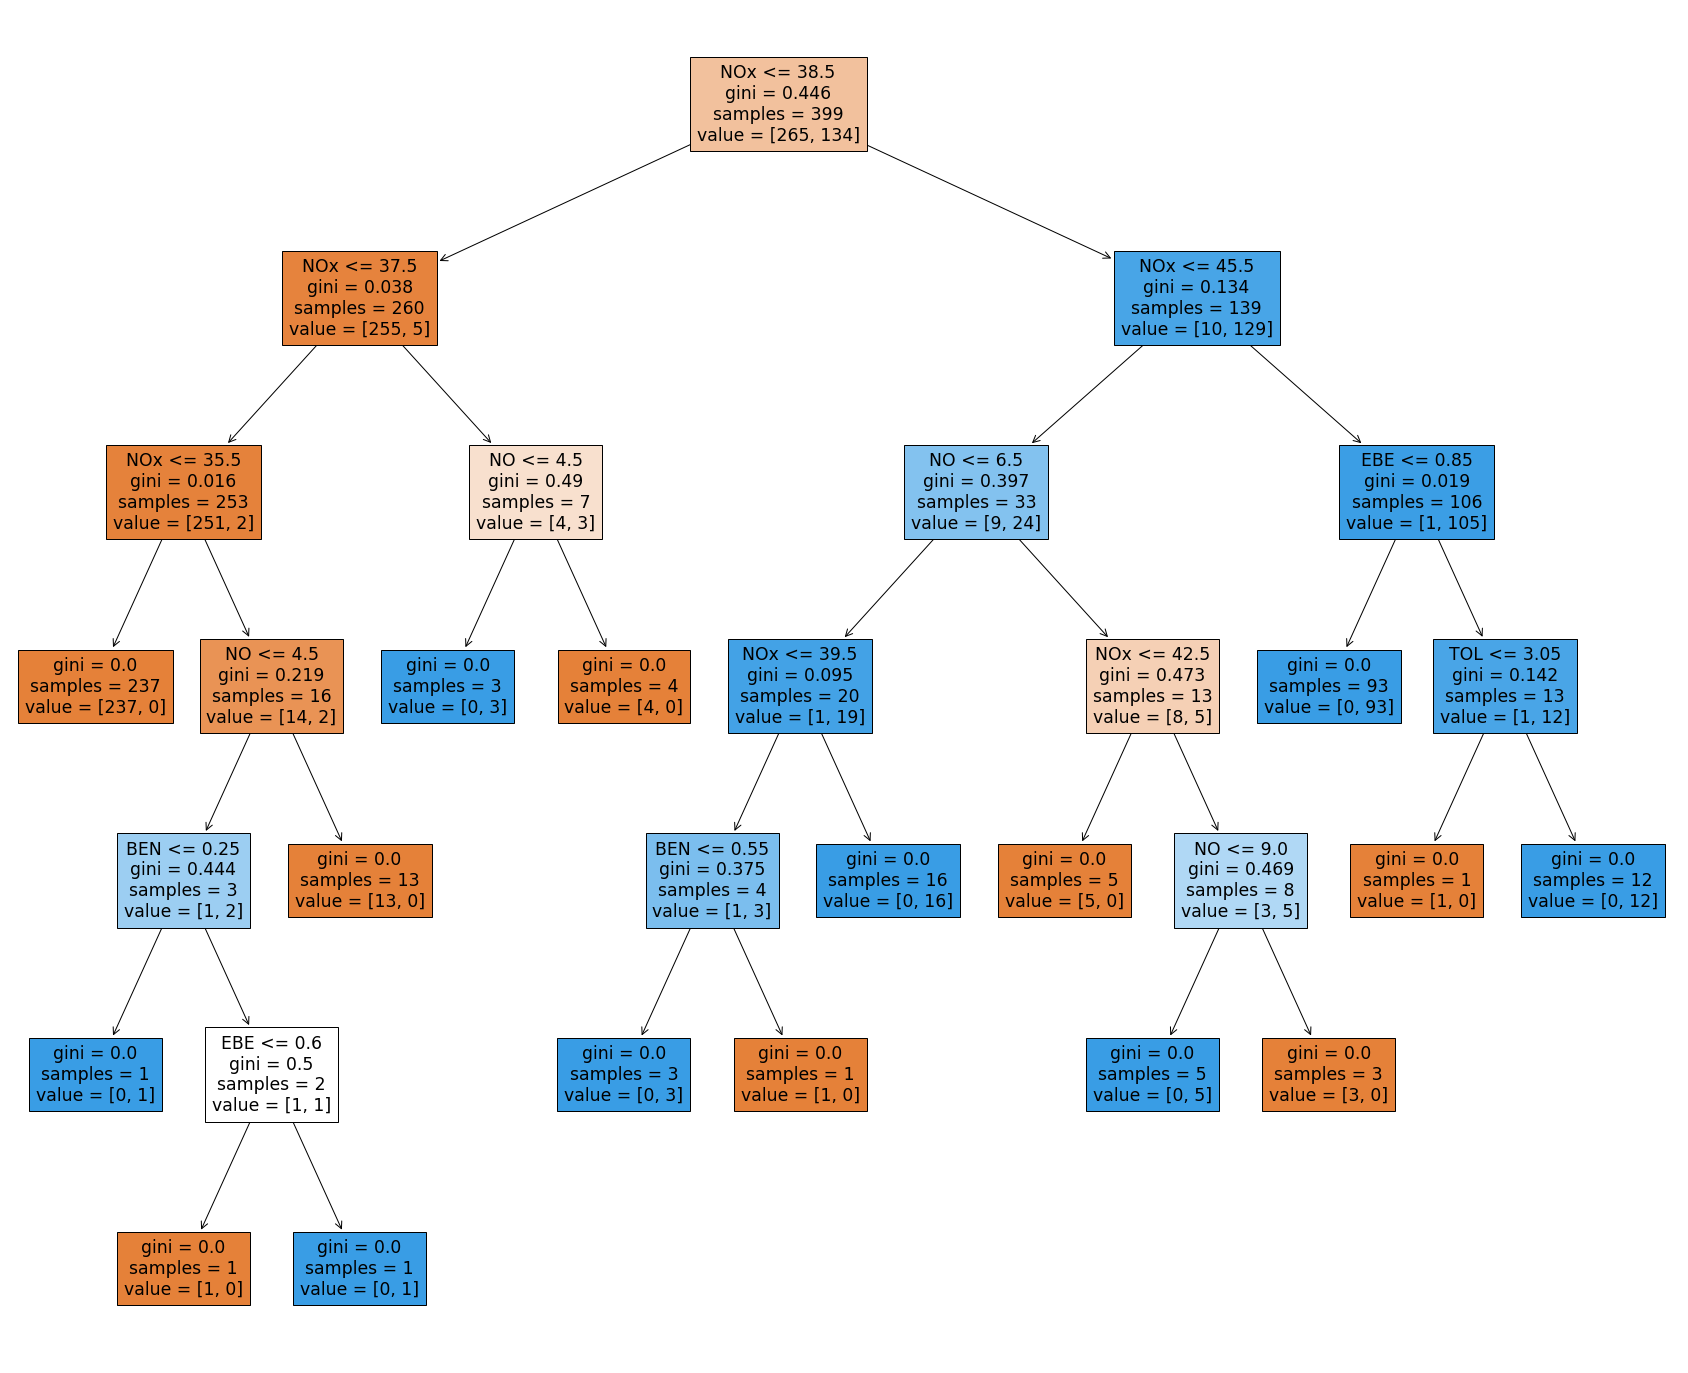

In [116]:
#Generamos el arbol sin limitar la profundidad llega a entropía 0 está sobre ajustado
arbol_6 = tree.DecisionTreeClassifier()
arbol_6 = arbol_6.fit(A_train, b_train)
fig=plt.figure(figsize=(30,25))
_=tree.plot_tree(arbol_6,feature_names=list(A_train.columns),filled=True)


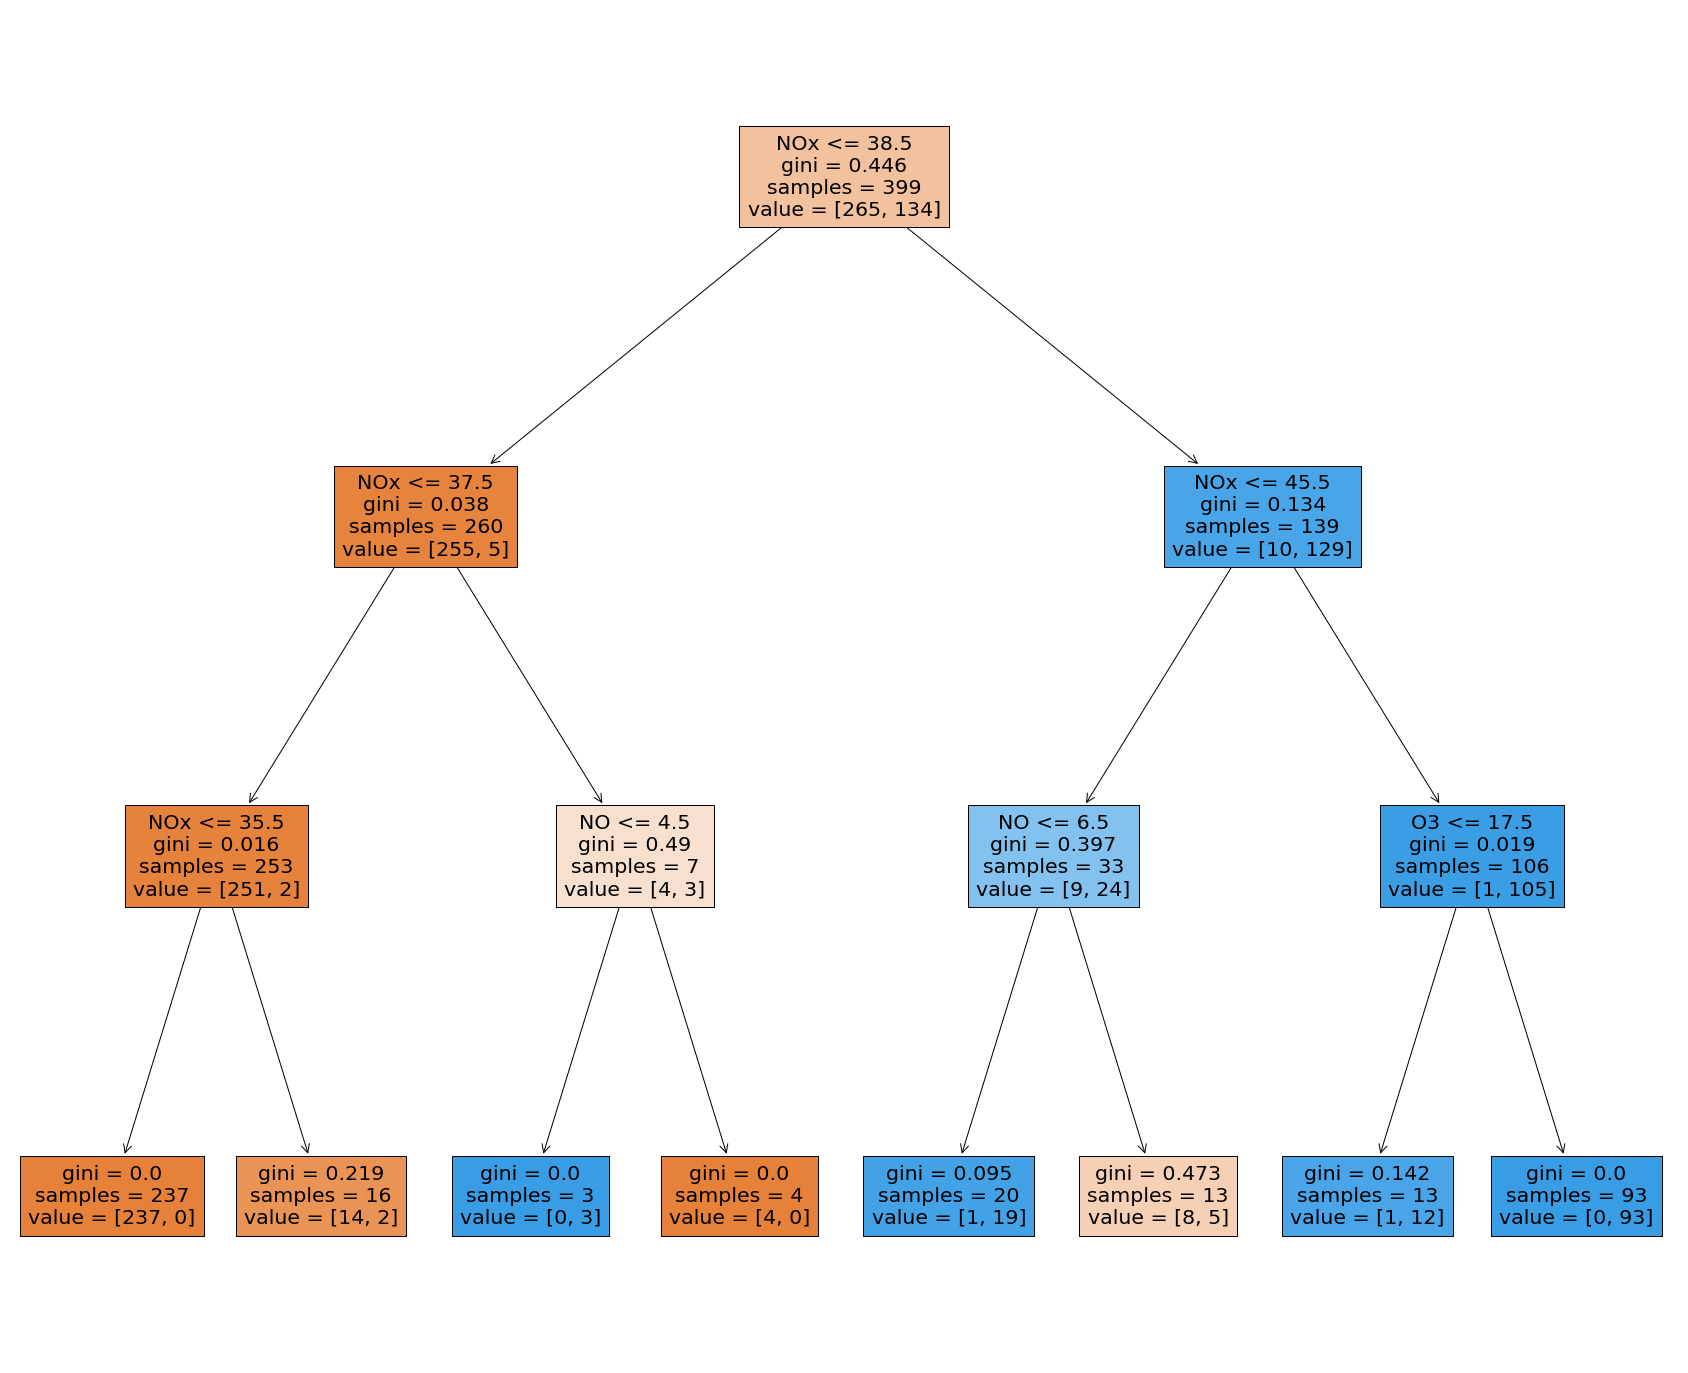

In [113]:
#Limitamos la profundidad a 3
arbol_7 = tree.DecisionTreeClassifier(max_depth=3)
arbol_7 = arbol_7.fit(A_train, b_train)
fig=plt.figure(figsize=(30,25))
_=tree.plot_tree(arbol_7,feature_names=list(A_train.columns),filled=True)


TRAIN
Accuracy:  0.9774436090225563
F1:  0.9657794676806083
TEST
Accuracy:  0.9415204678362573
F1:  0.9019607843137256
[[115   3]
 [  7  46]]


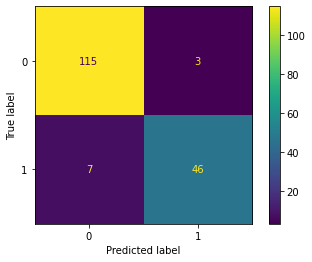

In [114]:
#Métricas evaluación (Matriz de confusión)
b_train_predicted=arbol_7.predict(A_train)
train_cnf=confusion_matrix(b_train,b_train_predicted)
print ("TRAIN")
print ("Accuracy: ", accuracy_score(b_train,b_train_predicted))
print ("F1: ", f1_score(b_train,b_train_predicted))


b_test_predicted=arbol_7.predict(A_test)
test_cnf=confusion_matrix(b_test,b_test_predicted)
print ("TEST")
print ("Accuracy: ", accuracy_score(b_test,b_test_predicted))
print ("F1: ", f1_score(b_test,b_test_predicted))

print (test_cnf)

_=ConfusionMatrixDisplay(test_cnf).plot()